http://neuralnetworksanddeeplearning.com/chap2.html

https://blog.csdn.net/xierhacker/article/details/53431207?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161590420616780255238907%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=161590420616780255238907&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-1-53431207.first_rank_v2_pc_rank_v29_10&utm_term=backpropagation


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Notation

- use $\omega_{jk}^l$ to denote the weight for the connection from the $k^{th}$ neuron in the $(l-1)^{th}$ layer to the $j^{th}$ neuron in the $l^{th}$ layer.
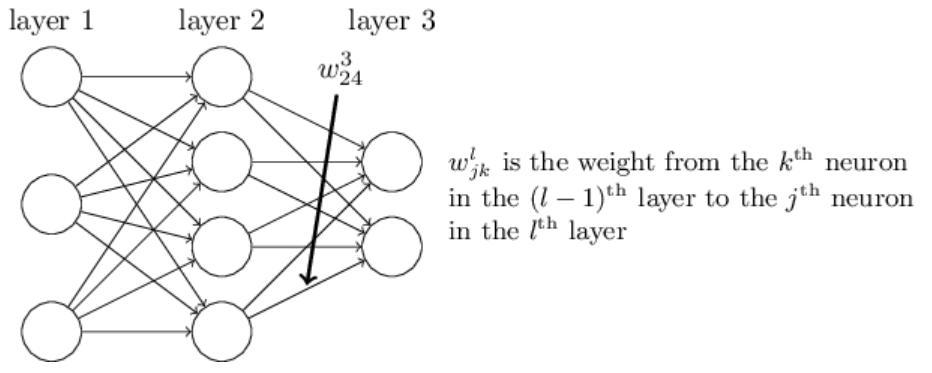

- use $b_j^l$ to denote the bias of the $j^{th}$ neuron in the $l^{th}$ layer; $a_j^l$ for the activation of the $j^{th}$ neuron in the $l^{th}$ layer.
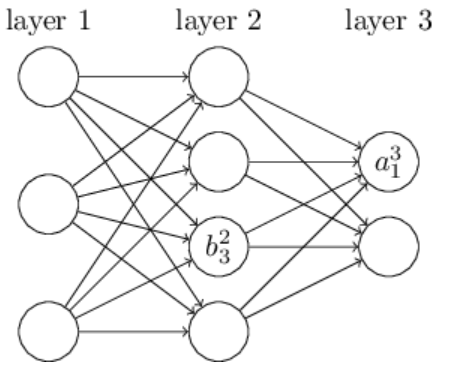

With these notations, the activation $a_j^l$ of the $j^{th}$ neuron in the $l^{th}$ layer is related to the activations in the $(l-1)^{th}$ by the equation:

$$ a_j^l = \sigma \left (\sum_k{\omega_{jk}^l a_k^{l-1} + b_j^l} \right), (23) $$

where the sum is over all neurons $k$ in the $(l-1)^{th}$ layer.

To rewrite this expression in a **matrix form** we define a **weight matrix $\omega^l$** for each layer $l$.

The entries of the weight matrix $\omega^l$ are just the weights connecting to the $l^{th}$ layer of neurons, that is, the entry in the $j^{th}$ row and $k^{th}$ column is $\omega_{jk}^l$.

Similarly, for each layer $l$ we define a **bias vector $b_j^l$**. The components of the bias vector are just the values $b_j^l$.

And finally, we define an **activation vector $a^l$** whose components are the activations $a_j^l$.

With these notatoins in mind, Equation(23) can be rewritten in the compact vectorized form.

$$a^l = \sigma(\omega^l a^{l-1} + b^l)  \;\;\;\;    (25)$$

WHen using Equation(25) to compute $a^l$, we compute the intermediate quantity $z^l = \omega^la^{l-1} + b^l $ along the way. We call $z^l$ the **weighted input** to the neurons in layer $l$. Sometimes, Equation (25) is written in terms of the weighted input, as $a^l = \sigma(z^l)$.

### The two assumptions about the cost function

**The goal of backpropagation is to compute the partial derivatives $\partial C / \partial\omega$ and $\partial C / \partial b$ of the cost function C with respect to any weight \omega or bias $b$ in the network**.

We will use the **quadratic cost function** in the form:

$$ C = \cfrac{1}{2n}\sum_x\parallel y(x) - a^L(x)\parallel ^2 \;\;\;\; (26)$$

where: $n$ is the total number of training examples; 
the sum is over individual training examples, $x$;
$y=y(x)$ is the corresponding desired output(true value);
$L$ denotes the number of layers in the network;
and $a^L=a^L(x)$ is the vector of activations output from the network when x is the input (predicted value).

**The first assumption** is that the cost function can be written as an average $C=\cfrac{1}{n}\sum_x C_x$ over 
cost function $C_x$ for individual training examples, $x$.

This is the case for the **quadratic cost function**, where the cost for a single training example is 
$C_x =  \cfrac{1}{2}\parallel y - a^{L} \parallel ^2 $

**The second assumption** is that cost function can be written as a function of the outputs from the neural network.

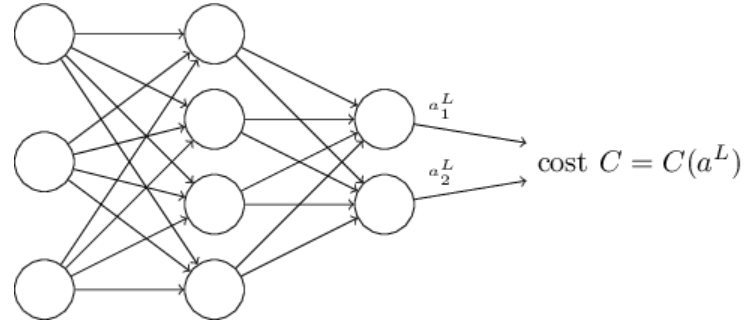

For example, the quadratic cost function for a single training example $x$ may be written as:

$$ C = \cfrac{1}{2}\parallel y - a^L \parallel ^2 = \cfrac{1}{2}\sum_j(y_i - a_j^L)^2, \;\;\;\;(27) $$

and thus is a function of output activations. 

### The Hadamard product or Schur product, $s\bigodot t$

use $s \bigodot t$ to denote the **elementwise** product of the two vectors.

$s\bigodot t = s_j \cdot t_j$ For example

$ \left[\begin{matrix}1 \cr 2 \end{matrix} \right] \bigodot \left[\begin{matrix}3 \cr 4 \end{matrix} \right] = \left[\begin{matrix}1 * 3 \cr 2 * 4 \end{matrix} \right] =\left[\begin{matrix}3 \cr 8 \end{matrix} \right]$

### The four foundamental equations behind backpropagation

**Backpropgation** is about understanding **how changing the weights and biases in a network changes the cost function**.

Ultimately, this means **computing the partial derivatives** $ \partial C / \partial \omega_{jk}^l$ and $ \partial C / \partial b_j^l$.

But to compute those, we first introduce an intermediate quantity, $\delta_j^l$, which we call **the *error* in the $j^{th}$ neuron in the $l^{th}$ layer**. 

Backpropagation will give us a procedure to compute the error $\delta_j^l$, then we will relate $\delta_j^l$ to $ \partial C / \partial \omega_{jk}^l$ and $ \partial C / \partial b_j^l$.

We define the error  $\delta_j^l$ of neuron $j^{th}$ in $l^{th}$ layer by :

$$ \delta_j^l \equiv \cfrac{\partial C}{\partial z_j^l}\;\;\;\;(29)$$

We use $\delta^l$ to denote the vector of errors associated with layer $l$.

#### An equation for the error in the output layer, $\delta^L$

The components of $\delta^L$ are given by:

$$ \delta^L = \cfrac{\partial C}{\partial a_j^L} \sigma\prime(z_j^L)\;\;\;\;（BP1) $$

The first term on the right $\partial C / \partial a_j^L$, just measures how fast the cost is changing as a function of the $j^{th}$ output activation.

The second term on the right,$\sigma\prime(z_j^L)$ measures how fast the activation $\sigma$ is changing at $z_j^L$.

Note that evertying in the (BP1) is easily computed.

Equation (BP1) is a componentwise expression for $\delta^L$. However, it's easy to rewrite the equation in a matrix-based form, as:

$$\delta^L =\nabla_a C \odot \sigma\prime(z^L)\;\;\;\;(BP1a)$$.

Here, $\nabla_a C$ is defined to be a vector whose components are the partial derivatives $\partial C/\partial a_j^L$.

You can think of $\nabla_a C $ as expressing the rate of change of C with respect to the output activations. 

As an example, in the case of quadratic cost we have $\nabla_a C = (a^L-y)$, and so the fully matrix-based form of (BP1) becomes

$$ \delta^L = (a^L-y)\odot \sigma\prime(z^L) $$

Everything in this expression has a nice vector form and is easily computed using a library such as Numpy.

#### An equation for the error $\delta^l$ in terms of the error in the next layer, $\delta^{l+1}$

$$ \delta^l = ((\omega^{l+1})^T \delta^{l+1})\odot \sigma\prime(z^l)\;\;\;\;(BP2)$$

Where $(\omega^{l+1})^T$ is the transpose of the weight matrix $\omega^{l+1}$ for the $(l+1)^{th}$ layer.

When we apply the transpose weight matrix,$(\omega^{l+1})^T$, we can think intuitively of this as moving the error ***backward*** through the network, giving us some sort of measure of the error at the output of the $l^{th}$ layer.

By combining (BP2) with (BP1) we can compute the error $\delta^l$ for any layer in the network.

#### An equation for the rate of change of the cost with respect to any bias in the network

$$\partial C / \partial b_j^l = \delta_j^l\;\;\;\;(BP3) $$

That is, the error $\delta_j^l$ is ***exactly equal*** to the rate of change $\partial C / \partial b_j^l$.

We can rewrite (BP3) in shorthand as 

$$ \partial C / \partial b = \delta \;\;\;\;(31) $$

#### An equation for the rate of change of the cost with respect to any weight in the network

$$ \cfrac{\partial C}{\partial \omega_{jk}^l} = a_k^{l-1}\delta_j^l \;\;\;\; (BP4) $$ 

This tells us how to compute the partial derivatives $ \partial C / \partial \omega_{jk}^l $ in terms of the quantities $\delta^l$ and $a^{l-1}$, which we already know how to compute.

This equation can be rewritten in a less index-heavy notation as:

$$ \cfrac{\partial C}{\partial \omega} = a_{in}\delta_{out}\;\;\; (32)  $$

where it's understood that $a_{in}$ is the activation of the neuron input to the weight $\omega$, and $\delta_{out}$ is the error of the neuron output from the weight $\omega$. We can depict this as:

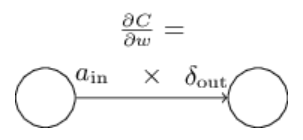
